![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://i1.wp.com/www.roadbikerider.com/wp-content/uploads/2019/02/type-of-road-bikes.png?fit=750%2C420&ssl=1"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Bike store sales

In this Exploratory Data Analysis, I'll be analyzing sales made on bike stores (Database taken from the [Free Code Camp](https://www.freecodecamp.org/) data Analysis course)

[Follow this data in a Google Spreadsheet](https://docs.google.com/spreadsheets/d/1NOe_UrPx6ULF2C5MvHmZ9ODuw8t9M77Q1Y64gP-7JHA/edit?usp=sharing)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Exploratory Data Analysis (EDA)

### A- Loading libraries. Hands on!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### B- Loading our data:

As we saw on previous courses we can read data simply using Python.

In [3]:
sales = pd.read_csv('sales_data.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### C- A glance at the data:

In [7]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,11/26/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,3/23/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,3/23/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,5/15/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [8]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,4/12/2016,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,4/2/2014,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,4/2/2016,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,3/4/2014,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,3/4/2016,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [9]:
sales.shape

(113036, 18)

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [12]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [8]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

In [9]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

In [10]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

In [11]:
sales['State'].value_counts()

California             22450
British Columbia       14116
England                13620
Washington             11264
New South Wales        10412
Victoria                6016
Oregon                  5286
Queensland              5220
Saarland                2770
Nordrhein-Westfalen     2484
Hessen                  2384
Seine (Paris)           2328
Hamburg                 1836
Seine Saint Denis       1684
Nord                    1670
South Australia         1564
Bayern                  1426
Hauts de Seine          1084
Essonne                  994
Yveline                  954
Tasmania                 724
Seine et Marne           394
Moselle                  386
Loiret                   382
Val d'Oise               264
Garonne (Haute)          208
Brandenburg              198
Val de Marne             158
Charente-Maritime        148
Somme                    134
Loir et Cher             120
Pas de Calais             90
Alberta                   56
Texas                     30
Ohio          

### Column organizacion for sales_data.csv:

_1- Column distribution:_

**TIME-data** is provided through **4** columns (Date, Day, Month, Year)

**LOCATION-data** is provided through **2** columns (Country, State)

**COSTUMER-data** is provided through **3** columns (Customer_Age, Age_Group Customer_Gender)

**PRODUCT-data** is provided through **5** columns (Product_Category, Sub_Category, Product, Unit_Cost, Unit_Price)

**TRANSACTION-data** is provided through **4** columns (Order_Quantity, and as derivated values: Cost, Revenue, and Profit)

For a total of **18** columns and **113036** sells/transactions.

_2- Column ranges/organization:_

**TIME-data** ranges from 2011 to 2016

**LOCATION-data** is focussed mainly on USA,UK,AUS,CA (+) France,Germany.

**COSTUMER-data** is organized into 4 categories: Youth (<25), Young Adults (25-34), Adults (35-64), Seniors (64+). 

**PRODUCT-data** is organized into 3 categories: Accesories, Bikes, Clothing


In **TRANSACTION-data** the average number of units per sell is 11. The average value in dollar for Cost, Revenue, and Profit are: 469, 754, and 285.


_3- Column AXES of analysis:_

The Axes column in the table is **Profit**. we will use this one to evaluate the performan of other columns/groups(Location, Buyers info, Product info.) represented with the **number of sells** on a specific **Time**

We can **TIME**-plot certain columns to determine their change in time and the effect of previous decisions.

_4- Columns **recommended** to add for future analysis:_
* It would be usefull to know the way the transaccion was done('CC/DC',Check, Cash, Online)

* It would be usefull to know the hour the sale was done.
* It would be usefull to know which agent did the sale.
* It would be usefull to add a optinal 'reason of your purchase' (For me, As a Birthday gift, As a Chrismas gift, Black Friday, etc)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### D- Analysis and visualization:

#### D.1. Numerical analysis and visualization

##### D.1.1 Let's visualize several series.

In [15]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [13]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

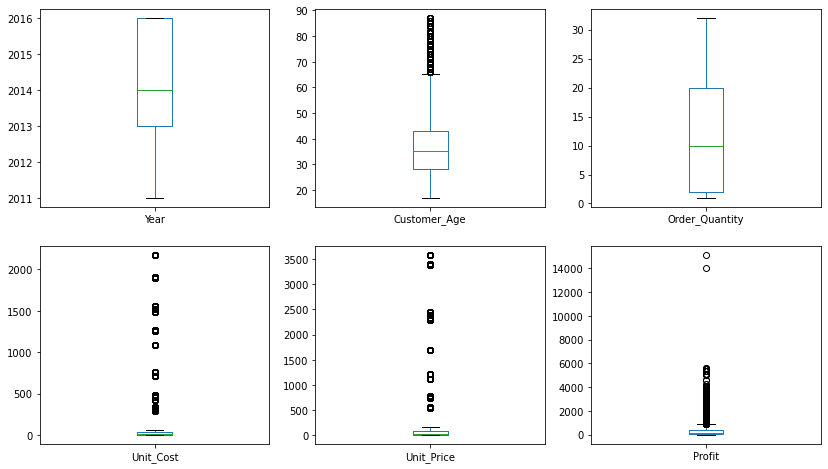

In [14]:
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

* 50% of the sells were made between 2013 and 2016, 
* 50% of the buyers are within 30-40 years old.
* 50% of the purchases are within 2 and 20 units
* Unit cost and price have lots of values out of the 99% where the rest is.


##### D.1.2 Let's pick one of the series to make a deeper analysis

We'll analyze the _'Profit'_ column:

In [18]:
sales['Profit'].describe()

count    113036.000000
mean        285.051665
std         453.887443
min         -30.000000
25%          29.000000
50%         101.000000
75%         358.000000
max       15096.000000
Name: Profit, dtype: float64

In [20]:
sales['Profit'].median()

101.0

In [21]:
sales['Profit'].mean()

285.0516649562971

_**BOX Diagrams**_

<AxesSubplot:>

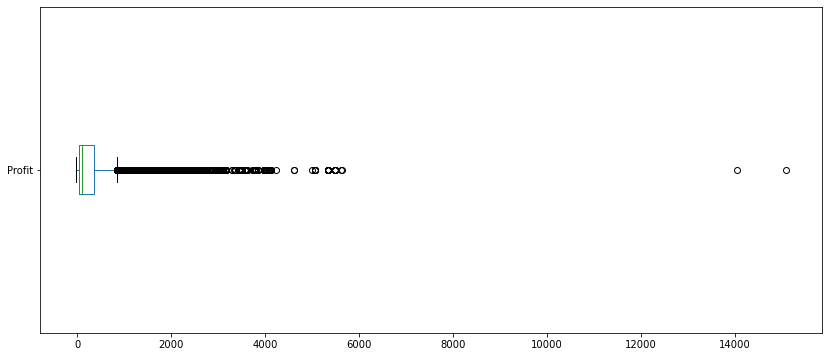

In [26]:
sales['Profit'].plot(kind='box', vert=False, figsize=(14,6))

_**DENSITY diagram:**_

<AxesSubplot:ylabel='Density'>

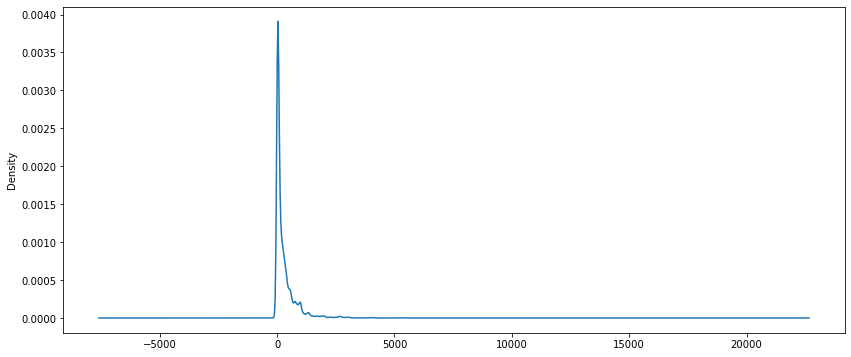

In [24]:
sales['Profit'].plot(kind='density', figsize=(14,6))

_**(DENSITY + mean + median) diagram:**_

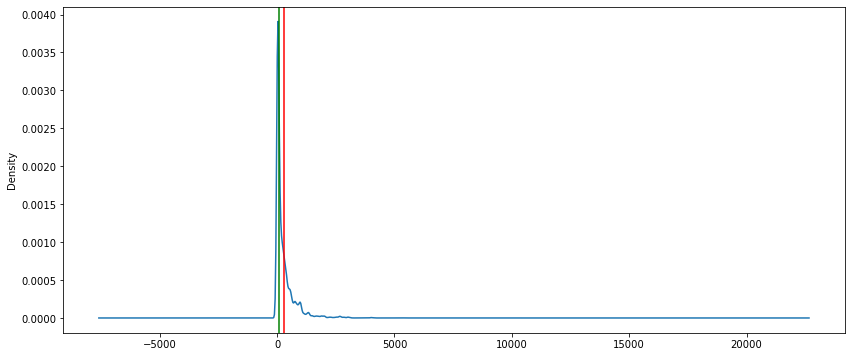

In [29]:
ax = sales['Profit'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Profit'].mean(), color='red')
ax.axvline(sales['Profit'].median(), color='green')

_**HISTOGRAM diagram:**_

Text(0.5, 0, 'dollars')

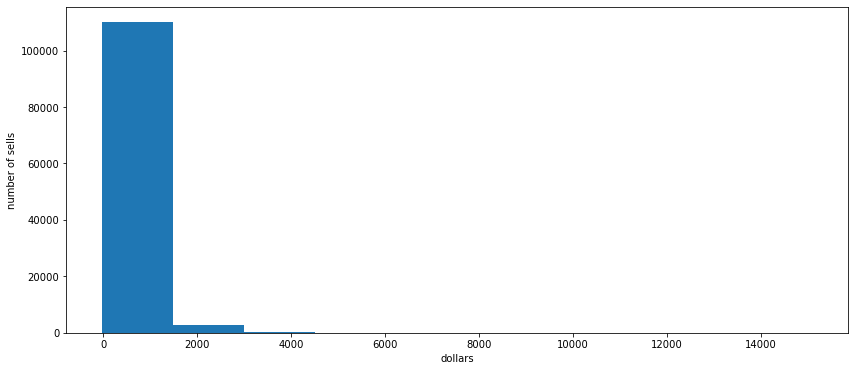

In [34]:
ax = sales['Profit'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('number of sells')
ax.set_xlabel('dollars')

#### D.2. Categorical analysis and visualization

##### D.2.1 Let's analyze the LOCATION COLUMNS, _Country and State_ :

In [35]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

In [50]:
salesUSA = sales.loc[sales['Country'] == 'United States']
salesUSA

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
22,3/27/2014,27,March,2014,51,Adults (35-64),M,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,120,524,405,929
23,3/27/2016,27,March,2016,51,Adults (35-64),M,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,407,315,722
34,7/19/2013,19,July,2013,32,Young Adults (25-34),F,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,120,524,405,929
35,7/19/2015,19,July,2015,32,Young Adults (25-34),F,United States,Oregon,Accessories,Bike Racks,Hitch Rack - 4-Bike,9,45,120,524,405,929
38,7/13/2013,13,July,2013,43,Adults (35-64),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,10,45,120,726,450,1176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113021,10/2/2015,2,October,2015,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",24,24,64,929,576,1505
113022,3/20/2014,20,March,2014,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",28,24,64,1084,672,1756
113023,3/20/2016,20,March,2016,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",26,24,64,1007,624,1631
113024,4/3/2014,3,April,2014,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",16,24,64,620,384,1004


In [58]:
salesUSA['State'].value_counts()

California        22450
Washington        11264
Oregon             5286
Texas                30
Illinois             28
Ohio                 28
New York             20
Florida              14
Utah                 10
Kentucky             10
South Carolina       10
Georgia               8
Wyoming               8
Missouri              6
Montana               6
Minnesota             6
Alabama               4
Arizona               4
Virginia              4
North Carolina        4
Mississippi           4
Massachusetts         2
Name: State, dtype: int64

In [52]:
salesAustralia = sales.loc[sales['Country'] == 'Australia']
salesAustralia

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2,3/23/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,3/23/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,5/15/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,5/15/2016,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,5/22/2014,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112999,4/6/2016,6,April,2016,58,Adults (35-64),F,Australia,New South Wales,Clothing,Vests,"Classic Vest, L",22,24,64,697,528,1225
113008,1/18/2014,18,January,2014,32,Young Adults (25-34),F,Australia,Victoria,Clothing,Vests,"Classic Vest, M",28,24,64,744,672,1416
113009,1/18/2016,18,January,2016,32,Young Adults (25-34),F,Australia,Victoria,Clothing,Vests,"Classic Vest, M",29,24,64,770,696,1466
113032,4/2/2014,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183


In [53]:
salesAustralia['State'].value_counts()

New South Wales    10412
Victoria            6016
Queensland          5220
South Australia     1564
Tasmania             724
Name: State, dtype: int64

_**PIE CHART:**_

<AxesSubplot:ylabel='Country'>

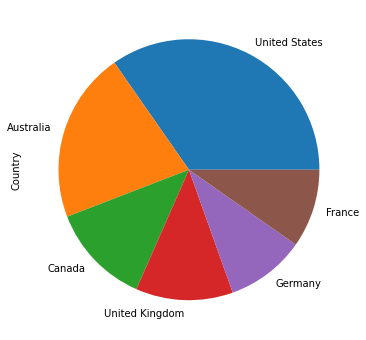

In [56]:
sales['Country'].value_counts().plot(kind='pie', figsize=(6,6))

_**HISTOGRAM:**_

Text(0, 0.5, 'Number of Sales')

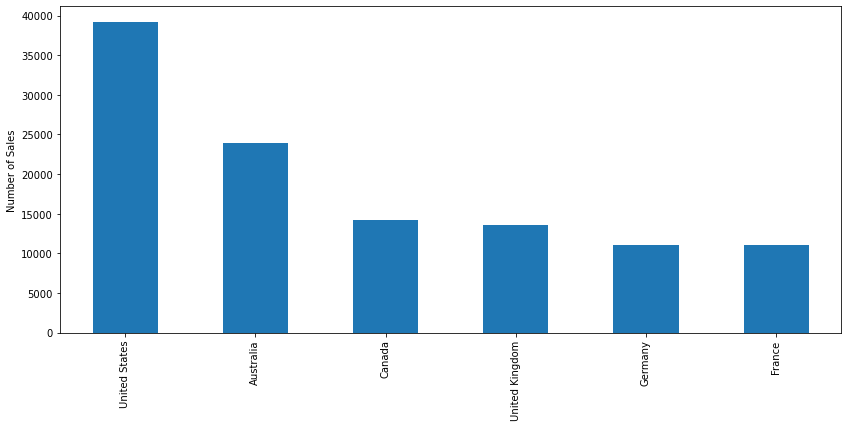

In [57]:
ax = sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

CONCLUSIONS:
* xxx
* XXX

##### D.2.2 Let's analyze the COSTUMER COLUMNS: Customer_Age, Age_Group, Customer_Gender :

In [66]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

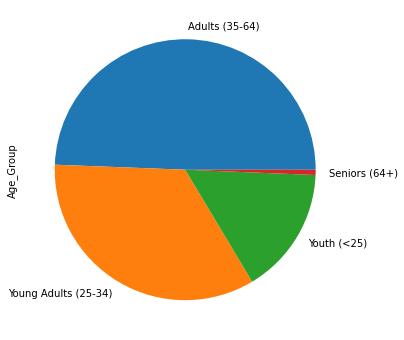

In [68]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

In [67]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<AxesSubplot:ylabel='Customer_Gender'>

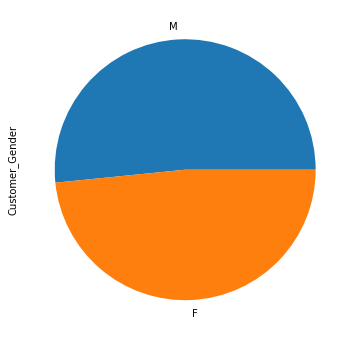

In [69]:
sales['Customer_Gender'].value_counts().plot(kind='pie', figsize=(6,6))

CONCLUSIONS:
* xxx
* XXX

##### D.2.3 Let's analyze the PRODUCT INFO Colums:  Product_Category,  Sub_Category, Product:

In [59]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<AxesSubplot:ylabel='Product_Category'>

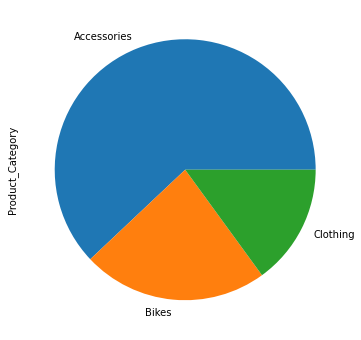

In [60]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

In [61]:
sales['Sub_Category'].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

In [63]:
accesories = sales[sales['Product_Category'] == 'Accessories']
accesories

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,11/26/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,3/23/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,3/23/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,5/15/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108369,3/4/2016,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,15,25
108370,4/27/2014,27,April,2014,37,Adults (35-64),F,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,13,1,2,8,13,21
108371,4/27/2014,27,April,2014,37,Adults (35-64),F,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,5,1,2,3,5,8
108372,4/27/2016,27,April,2016,37,Adults (35-64),F,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,15,25


In [64]:
accesories['Sub_Category'].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

Text(0, 0.5, 'Number of Sales')

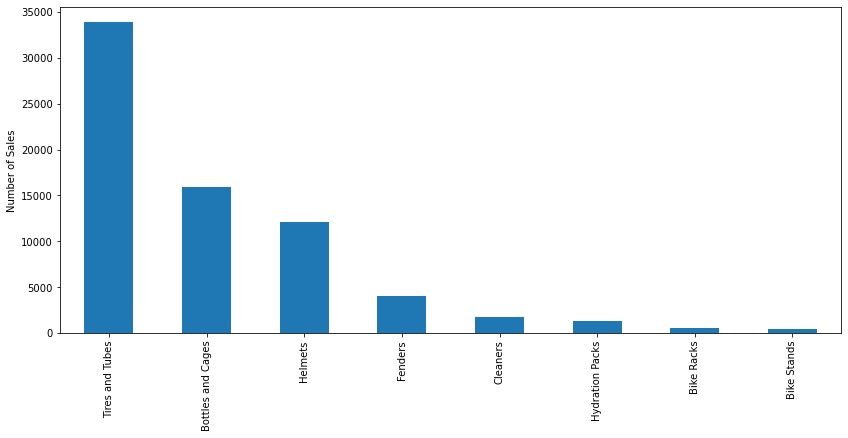

In [65]:
ax = accesories['Sub_Category'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')


CONCLUSIONS:
* xxx
* XXX

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### E- Relationship between the columns:

Can we find any significant relationship?

In [71]:
corr = sales.corr()

corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


_**CORRELATION MAP:**_

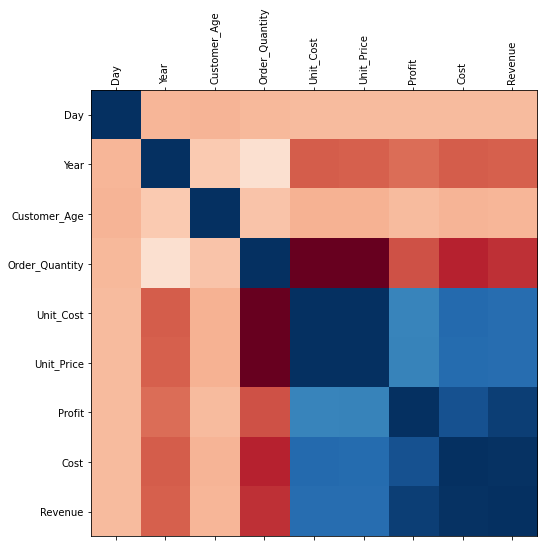

In [72]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

_**SCATTER PLOT 1 (no correlation):**_

<AxesSubplot:xlabel='Order_Quantity', ylabel='Unit_Cost'>

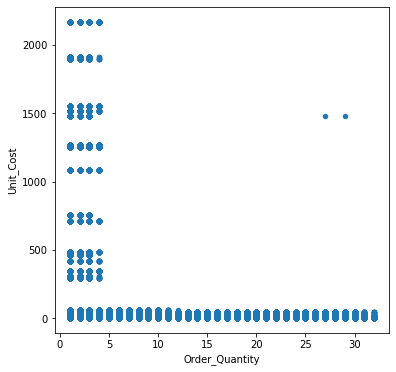

In [74]:
sales.plot(kind='scatter', x='Order_Quantity', y='Unit_Cost', figsize=(6,6))

_**SCATTER PLOT 2 (correlation):**_

<AxesSubplot:xlabel='Revenue', ylabel='Cost'>

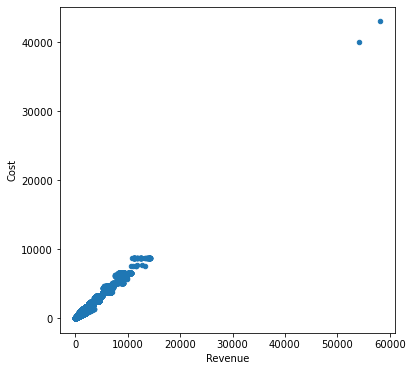

In [75]:
sales.plot(kind='scatter', x='Revenue', y='Cost', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### F- Column wrangling.:

We can also create new columns or modify existing ones: for verification purposes (Numerical consistency of the data) or for analysis purposes(Aditional analysis).

#### F.1. Numerical consistency of the data:

Let's verify the consistency of the column Cost, by Adding a new called: Calculated_Cost, using the following formula:

$$ Calculated\_Cost = Order\_Quantity * Unit\_Cost $$

In [5]:
sales['Calculated_Cost']= sales['Order_Quantity'] * sales['Unit_Cost']

In [6]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost
0,11/26/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,360
1,11/26/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,360
2,3/23/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,1035
3,3/23/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,900
4,5/15/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,180


In [7]:
sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

Now, let's check if there is difference between the original column and the calculated one, for verification purposes:

In [8]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

#### F.2. Aditional analysis:

Let's calculate a new _Revenue_per_Age_ column:

In [9]:
sales['Revenue_per_Age']= sales['Revenue'] / sales['Customer_Age']

In [10]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Revenue_per_Age
0,11/26/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,360,50.000000
1,11/26/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,360,50.000000
2,3/23/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,1035,49.000000
3,3/23/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,900,42.612245
4,5/15/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,180,8.893617


In [11]:
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### G- Querying or indexing the data

Let's find specific data and solve key questions in the analysis:

#### G.1. Specific data:

* Get all the sales made in the state of Kentucky

In [14]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Revenue_per_Age
156,11/4/2013,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108,45,2.700
157,11/4/2015,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108,45,2.700
23826,4/16/2014,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22,142,96,238,96,5.950
23827,4/16/2016,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22,165,112,277,112,6.925
31446,4/16/2014,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,35,537,377,914,377,22.850
31447,4/16/2016,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,35,574,403,977,403,24.425
79670,4/16/2014,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,30,32,22,54,22,1.350
79671,4/16/2014,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30,336,231,567,231,14.175
79672,4/16/2016,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,30,16,11,27,11,0.675
79673,4/16/2016,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,30,288,198,486,198,12.150


* Get the mean revenue of the Adults (35-64) sales group

In [22]:
sales3564 = sales[sales['Age_Group'] == 'Adults (35-64)']

In [23]:
sales3564

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Cost,Revenue_per_Age
2,3/23/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,1035,49.000000
3,3/23/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,900,42.612245
4,5/15/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,180,8.893617
5,5/15/2016,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522,225,11.106383
6,5/22/2014,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379,180,8.063830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113029,12/28/2015,28,December,2015,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123,48,3.000000
113030,4/12/2014,12,April,2014,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",6,24,64,225,144,369,144,9.000000
113031,4/12/2016,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,72,4.487805
113034,3/4/2014,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,576,34.054054


In [24]:
sales3564['Revenue'].mean()

762.8287654055604

or, a simpler way to do it is:

In [25]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

* How many records belong to Age Group Youth (<25) or Adults (35-64)?

In [26]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

* Get the mean revenue of the sales group Adults (35-64) in United States

In [27]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

#### G.2. key questions in the analysis:

* we want to reduce expenses, we want to close the store in each city certain period of time, which periods in each city should we close the store?
* we are gonna remove one of the age-category of the product, which one should we remove in which city?
* we are gonna remove one location of the company, which one should we remove?
* we are gonna remove three products with fewer sales, which ones should we remove?
* what are the products sold in bigger quantities? And which one per unit always..??
* which products have the lower relation revenue/profit?

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)